### Regression Review

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Other libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_linear = df[['age', 'fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [4]:
# Take numerical data
x = df[['age']]
y = df['fare']

In [5]:
#Check the null values

print(x.isnull().sum() / len(x) * 100)
print(y.isnull().sum() / len(y) * 100)

age    19.86532
dtype: float64
0.0


In [6]:
df_linear.age.fillna(value = df_linear['age'].mean(), inplace=True)

C:\Users\syedm\AppData\Local\Temp\ipykernel_31304\1602816702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value = df_linear['age'].mean(), inplace=True)


In [7]:
print(x.shape)
print(y.shape)

(891, 1)
(891,)


In [8]:
df_linear

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


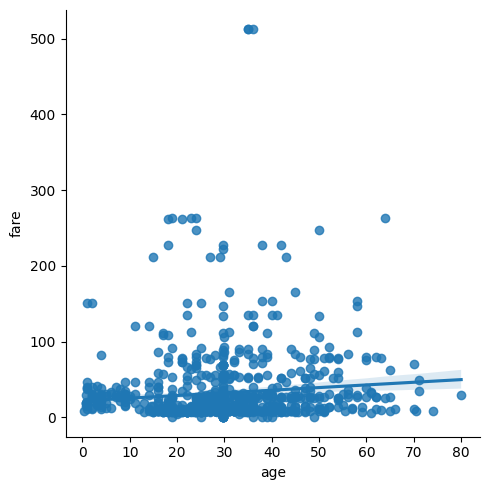

In [9]:
sns.lmplot(data=df_linear, x='age', y='fare')

<Axes: ylabel='age'>

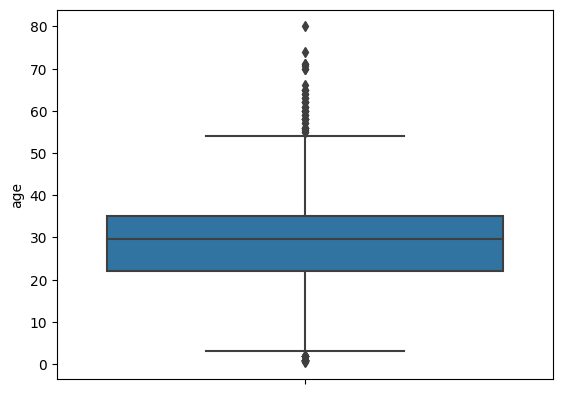

In [10]:
sns.boxplot(data=df_linear, y='age')

In [11]:
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

In [12]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 35)]

<Axes: ylabel='fare'>

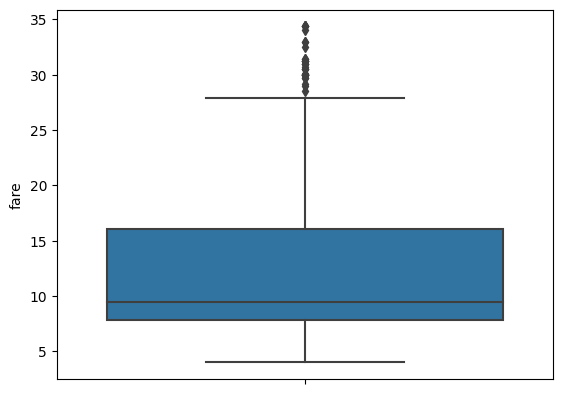

In [13]:
sns.boxplot(data=df_linear, y='fare')

In [14]:
X = df_linear[['age']]
y = df_linear['fare']

In [15]:
model = LR()

In [16]:
model.fit(X, y)

LinearRegression()

In [18]:
model.predict([[60]])

c:\Users\syedm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.57470754])

## Model Evaluation

1. R-Square
2. MSE
3. MAE
4. RMSE

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [20]:
print(x_train.shape)
print(x_test.shape)

(471, 1)
(118, 1)


In [22]:
#Model
model = LR()
model.fit(x_train, y_train)
pred = model.predict(x_test)

<Axes: xlabel='fare'>

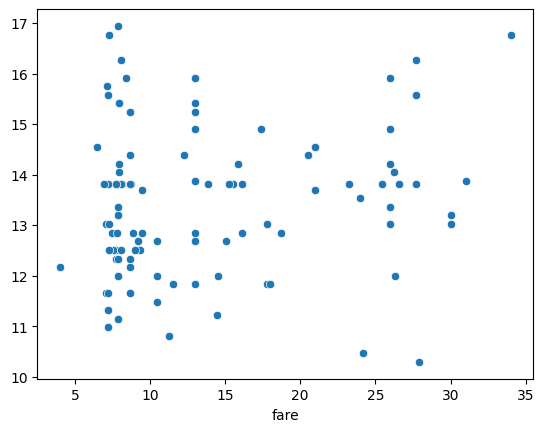

In [24]:
#Compare predictions with y_test
sns.scatterplot(x = y_test, y = pred)

In [25]:
model.score(x_test, y_test)

0.011630704655980706

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = pred)
print(mae)


6.0297680818884904


In [30]:
rmse = mean_squared_error(y_true = y_test, y_pred = pred, squared=False)
print(rmse)

7.2352608455098775


In [29]:
mse = mean_squared_error(y_true = y_test, y_pred = pred, squared=True)
print(mse)

52.348999502568304
